In [1]:
import numpy as np
import scipy as sc
import csv
import scipy.linalg as spl
import matplotlib.pyplot as plt
from opt_utils import *
from grad_utils import *
%matplotlib inline

# load data

In [2]:
data = np.load('simulation_data.npy')
latent = np.load('simulation_latent.npy')

# parameters

In [3]:
# optimization parameters
l_penalty = 1
max_iter = 1000
ths = 1e-12

# vanilla PGD parameters
step_size = 0.03

# backtracking parameters
step_init = 0.1
max_back = 100
a = 0.2
b = 0.5

# L2 penalty

## Gradient Descent

In [3]:
objective_gd, beta_gd = gd_l2(data = data)

initial objective value: 13028.394406
1-th GD, objective value: 12928.136999
2-th GD, objective value: 12832.960375
3-th GD, objective value: 12742.282942
4-th GD, objective value: 12655.882056
5-th GD, objective value: 12573.543993
6-th GD, objective value: 12495.064019
7-th GD, objective value: 12420.246389
8-th GD, objective value: 12348.904285
9-th GD, objective value: 12280.859685
10-th GD, objective value: 12215.943186
11-th GD, objective value: 12153.993781
12-th GD, objective value: 12094.858612
13-th GD, objective value: 12038.392686
14-th GD, objective value: 11984.458586
15-th GD, objective value: 11932.926163
16-th GD, objective value: 11883.672221
17-th GD, objective value: 11836.580204
18-th GD, objective value: 11791.539881
19-th GD, objective value: 11748.447035
20-th GD, objective value: 11707.203158
21-th GD, objective value: 11667.715156
22-th GD, objective value: 11629.895062
23-th GD, objective value: 11593.659753
24-th GD, objective value: 11558.930692
25-th GD, o

271-th GD, objective value: 10546.962826
272-th GD, objective value: 10546.962601
273-th GD, objective value: 10546.962382
274-th GD, objective value: 10546.962170
275-th GD, objective value: 10546.961964
276-th GD, objective value: 10546.961765
277-th GD, objective value: 10546.961571
278-th GD, objective value: 10546.961382
279-th GD, objective value: 10546.961199
280-th GD, objective value: 10546.961022
281-th GD, objective value: 10546.960849
282-th GD, objective value: 10546.960682
283-th GD, objective value: 10546.960519
284-th GD, objective value: 10546.960361
285-th GD, objective value: 10546.960208
286-th GD, objective value: 10546.960058
287-th GD, objective value: 10546.959913
288-th GD, objective value: 10546.959772
289-th GD, objective value: 10546.959635
290-th GD, objective value: 10546.955594
291-th GD, objective value: 10546.955533
292-th GD, objective value: 10546.955474
293-th GD, objective value: 10546.955416
294-th GD, objective value: 10546.955361
295-th GD, objec

542-th GD, objective value: 10546.953261
543-th GD, objective value: 10546.953261
544-th GD, objective value: 10546.953261
545-th GD, objective value: 10546.953261
546-th GD, objective value: 10546.953261
547-th GD, objective value: 10546.953261
548-th GD, objective value: 10546.953261
549-th GD, objective value: 10546.953261
550-th GD, objective value: 10546.953261
551-th GD, objective value: 10546.953261
552-th GD, objective value: 10546.953261
553-th GD, objective value: 10546.953261
554-th GD, objective value: 10546.953261
555-th GD, objective value: 10546.953261
556-th GD, objective value: 10546.953261
557-th GD, objective value: 10546.953261
558-th GD, objective value: 10546.953261
559-th GD, objective value: 10546.953261
560-th GD, objective value: 10546.953261
561-th GD, objective value: 10546.953261
562-th GD, objective value: 10546.953261
563-th GD, objective value: 10546.953261
564-th GD, objective value: 10546.953261
565-th GD, objective value: 10546.953261
566-th GD, objec

## ADMM

In [4]:
objective_admm, objective_admm_b_l2, beta_admm = admm_l2(data = data)

initial objective value: 13028.394406
1-th ADMM, objective value: 10632.145595
2-th ADMM, objective value: 10568.013903
3-th ADMM, objective value: 10548.058056
4-th ADMM, objective value: 10540.345237
5-th ADMM, objective value: 10537.010287
6-th ADMM, objective value: 10535.459636
7-th ADMM, objective value: 10534.694108
8-th ADMM, objective value: 10534.294683
9-th ADMM, objective value: 10534.074939
10-th ADMM, objective value: 10533.947815
11-th ADMM, objective value: 10533.870789
12-th ADMM, objective value: 10533.822170
13-th ADMM, objective value: 10533.790395
14-th ADMM, objective value: 10533.769029
15-th ADMM, objective value: 10533.754328
16-th ADMM, objective value: 10533.744030
17-th ADMM, objective value: 10533.736713
18-th ADMM, objective value: 10533.731456
19-th ADMM, objective value: 10533.727646
20-th ADMM, objective value: 10533.724865
21-th ADMM, objective value: 10533.722824
22-th ADMM, objective value: 10533.721319
23-th ADMM, objective value: 10533.720206
24-th

c:\python\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


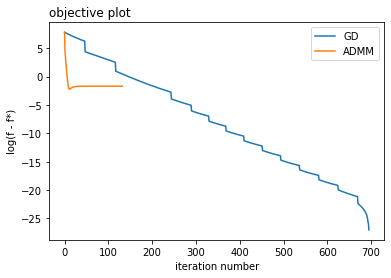

In [7]:
f = plt.figure(1, figsize = (6,4))
# obj_opt = np.min([np.min(objective_gd), 
#                   np.min(objective_admm)])
# plt.plot(np.log(objective_gd - obj_opt), label="GD")
# plt.plot(np.log(objective_admm - obj_opt), label="ADMM")

obj_opt = np.min([np.min(objective_gd), 
                  np.min(objective_admm_b_l2)])
plt.plot(np.log(objective_gd - obj_opt), label="GD")
plt.plot(np.log(objective_admm_b_l2 - obj_opt), label="ADMM")


plt.title("objective plot", loc='left')
plt.xlabel("iteration number")
plt.ylabel("log(f - f*)")
plt.legend()
f.savefig("converge_curve_l2.pdf", bbox_inches='tight')

c:\python\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


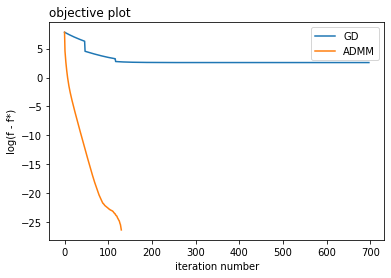

In [8]:
f = plt.figure(1, figsize = (6,4))
obj_opt = np.min([np.min(objective_gd), 
                  np.min(objective_admm)])
plt.plot(np.log(objective_gd - obj_opt), label="GD")
plt.plot(np.log(objective_admm - obj_opt), label="ADMM")

# obj_opt = np.min([np.min(objective_gd), 
#                   np.min(objective_admm_b_l2)])
# plt.plot(np.log(objective_gd - obj_opt), label="GD")
# plt.plot(np.log(objective_admm_b_l2 - obj_opt), label="ADMM")


plt.title("objective plot", loc='left')
plt.xlabel("iteration number")
plt.ylabel("log(f - f*)")
plt.legend()
f.savefig("converge_curve_l2.pdf", bbox_inches='tight')

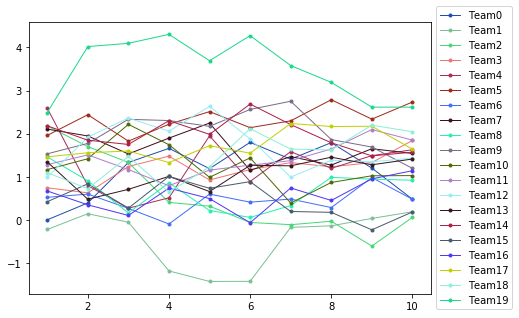

In [11]:
T, N = data.shape[0:2]
beta = beta_admm.reshape((T,N))
f = plt.figure(1, figsize = (9,5))
ax = plt.subplot(111)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=np.random.rand(3,),marker = '.',label = 'Team' + str(i),linewidth=1)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
f.savefig("l2_solution.pdf", bbox_inches='tight')